Os dados estão disponibilizados no site do Kaggle :

https://www.kaggle.com/datasets/uciml/mushroom-classification

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Entendimento do negócio



Uma empresa na área de gastronomia é especializada em coletar e vender cogumelos de diferentes tipos, entre esses cogumelos coletados existem os bons para consumo e os venenosos

* **Equipe:** Origins SA

* **Tema:** Cogumelos

* **Tipo:** Combinação de Métodos Preditores de Classificação.

* **Area de Atuação:** Gastronomia.

* **Empresa/Setor:** Super Mario World.

* **Problema:** O tempo necessário para a análise leva alguns dias devido ao número de profissionais que realizam a análise, conseguem analisar apenas 85% dos cogumelos coletados. Com isso muitos cogumelos acabam estragando, bons e venenosos. O tempo atual faz que a empresa tenha despesas altas.

* **Tarefa:** Descobrir quais são os cogumelos venenosos ou comestíveis.

* **Objetivo:** Diminuir o tempo de análise dos cogumelos de modo que a empresa diminua o valor perdido em cogumelos bons estragando, ou seja, colocar em ordem de maior chance de ser cogumelo bom para análise.

* **Critérios de Sucesso:** predizer pelo menos 85% dos cogumelos para colocar em ordem para analise e parar de perder cogumelos comestíveis.

# Entendimento dos dados

* Carregar os dados

In [ ]:
df = pd.read_csv('/content/mushrooms (3).csv')

* Quantidade de linhas e colunas

In [ ]:
df.shape

(8124, 23)

* Quais variáveis estão no dataset?

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

* Dicionário

'class' = 'ALVO', 'cap-shape' = 'FORMA DA TAMPA', 'cap-surface' = 'SUPERFÍCIE DA TAMPA',
'cap-color' = 'COR DA TAMPA', 'bruises' = 'CONTUSÕES', 'odor' = 'ODOR', 'gill-attachment' = 'ANEXO DE GUELRA', 
'gill-spacing' = 'ESPAÇAMENTO BRANQUIAL', 'gill-size' = 'TAMANHO DAS GUELREAS', 'gill-color' = 'COR DAS GUELREAS',
'stalk-shape' = 'FORMA DO CAULE', 'stalk-root' = 'RAIZ DO CAULE', 'stalk-surface-above-ring' = 'SUPERFICIE DA HASTE ACIMA DO ANEL',
'stalk-surface-below-ring' = 'SUPERFICIE DA HASTE ABAIXO DO ANEL', 'stalk-color-above-ring' = 'COR DA HASTE ACIMA DO ANEL',
'stalk-color-below-ring' = 'COR DA HASTE ABAIXO DO ANEL', 'veil-type' = 'TIPÓ DO VÉU', 'veil-color' = 'COR DO VÉU', 
'ring-number' = 'NÚMERO DE ANEL','ring-type' = 'TIPO DE ANEL', 'spore-print-color' = 'COR DE IMPRESSÃO DE ESPOROS', 
'population' = 'POPULAÇÃO', 'habitat' = 'HABITAT'

* Quais são as variáveis explicativas (features) e a variável alvo (target)?

**A variavel alvo é 'class', todo o resto são variaveis explicativas**

* A variável alvo é categórica ou contínua?

**A variavel alvo é uma variável categórica que diz se o cogumelo esta seguro (1) ou não (0)**

* Existem valores nulos? Quantos? Dá para tratar?

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.max()

class                       p
cap-shape                   x
cap-surface                 y
cap-color                   y
bruises                     t
odor                        y
gill-attachment             f
gill-spacing                w
gill-size                   n
gill-color                  y
stalk-shape                 t
stalk-root                  r
stalk-surface-above-ring    y
stalk-surface-below-ring    y
stalk-color-above-ring      y
stalk-color-below-ring      y
veil-type                   p
veil-color                  y
ring-number                 t
ring-type                   p
spore-print-color           y
population                  y
habitat                     w
dtype: object

In [ ]:
df.min()

class                       e
cap-shape                   b
cap-surface                 f
cap-color                   b
bruises                     f
odor                        a
gill-attachment             a
gill-spacing                c
gill-size                   b
gill-color                  b
stalk-shape                 e
stalk-root                  ?
stalk-surface-above-ring    f
stalk-surface-below-ring    f
stalk-color-above-ring      b
stalk-color-below-ring      b
veil-type                   p
veil-color                  n
ring-number                 n
ring-type                   e
spore-print-color           b
population                  a
habitat                     d
dtype: object

stalk-root apesar de ter uma variavel estranha ela está no dicionário

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# SEPARAR TREINO E TESTE

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state = 323)

In [ ]:
train.insert(0,'CONJUNTO','TRN')  # Cria coluna de treinamento

In [ ]:
test.insert(0,'CONJUNTO','TST')  # Cria coluna de test

In [ ]:
df = pd.concat([test, train])

In [ ]:
df

,CONJUNTO,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3324,TST,e,f,y,g,t,n,f,c,b,...,s,g,w,p,w,o,p,n,v,d
401,TST,e,b,y,w,t,a,f,c,b,...,s,w,w,p,w,o,p,k,n,m
7275,TST,p,k,y,n,f,y,f,c,n,...,s,p,w,p,w,o,e,w,v,l
2012,TST,e,x,f,e,t,n,f,c,b,...,s,g,w,p,w,o,p,k,v,d
5599,TST,e,x,y,w,f,n,f,c,n,...,f,w,w,p,w,o,f,h,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,TRN,p,f,f,y,f,f,f,c,b,...,k,b,n,p,w,o,l,h,y,d
6444,TRN,p,f,s,n,f,y,f,c,n,...,s,p,p,p,w,o,e,w,v,l
4144,TRN,p,x,f,g,f,f,f,c,b,...,k,p,n,p,w,o,l,h,y,p
7398,TRN,e,b,s,g,f,n,f,w,b,...,k,w,w,p,w,t,p,w,s,g


## EXPORTANTO CSV

In [ ]:
df.to_csv('pre_processamento_projeto.csv',sep='\t')

# PREPARAÇÃO DOS DADOS

## PRE PROCESSAMENTO DOS DADOS

### FORMA DA TAMPA

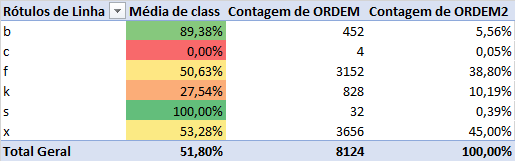

In [ ]:
df['FORMA_TAMPA_B_S'] = [1 if x == 'b' or x == 's' else 0 for x in df['cap-shape']] 
df['FORMA_TAMPA_F'] = [1 if x == 'f' else 0 for x in df['cap-shape']]
df['FORMA_TAMPA_X'] = [1 if x == 'x' else 0 for x in df['cap-shape']]

In [ ]:
df[['cap-shape', 'FORMA_TAMPA_B_S', 'FORMA_TAMPA_F', 'FORMA_TAMPA_X']].drop_duplicates()

,cap-shape,FORMA_TAMPA_B_S,FORMA_TAMPA_F,FORMA_TAMPA_X
3324,f,0,1,0
401,b,1,0,0
7275,k,0,0,0
2012,x,0,0,1
852,s,1,0,0
7706,c,0,0,0


### SUPERFÍCIE DA TAMPA

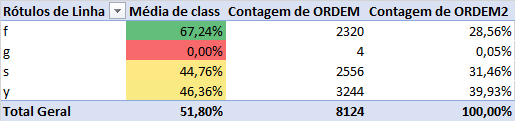

In [ ]:
df['SUPERFÍCIE_TAMPA_F'] = [1 if x == 'f' else 0 for x in df['cap-surface']]
df['SUPERFÍCIE_TAMPA_S'] = [1 if x == 's' else 0 for x in df['cap-surface']]
df['SUPERFÍCIE_TAMPA_Y'] = [1 if x == 'y' else 0 for x in df['cap-surface']]

In [ ]:
df[['cap-surface', 'SUPERFÍCIE_TAMPA_F', 'SUPERFÍCIE_TAMPA_S', 'SUPERFÍCIE_TAMPA_Y']].drop_duplicates()

,cap-surface,SUPERFÍCIE_TAMPA_F,SUPERFÍCIE_TAMPA_S,SUPERFÍCIE_TAMPA_Y
3324,y,0,0,1
2012,f,1,0,0
6086,s,0,1,0
5717,g,0,0,0


### COR DA TAMPA

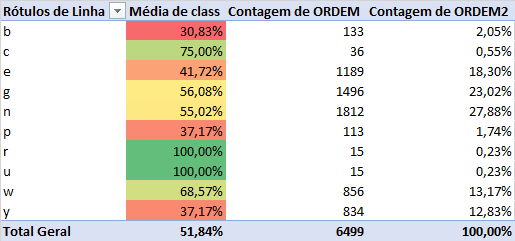

In [ ]:
df['COR_TAMPA_Y_P_B'] = [1 if x == 'y' or x == 'p' or x == 'b' else 0 for x in df['cap-color']] 
df['COR_TAMPA_G_N'] = [1 if x == 'g' or x == 'n' else 0 for x in df['cap-color']]
df['COR_TAMPA_W'] = [1 if x == 'w' else 0 for x in df['cap-color']]


df[['COR_TAMPA_W', 'COR_TAMPA_G_N', 'COR_TAMPA_Y_P_B', 'cap-color']].drop_duplicates()

,COR_TAMPA_W,COR_TAMPA_G_N,COR_TAMPA_Y_P_B,cap-color
3324,0,1,0,g
401,1,0,0,w
7275,0,1,0,n
2012,0,0,0,e
5040,0,0,1,y
7946,0,0,0,c
5907,0,0,1,p
5129,0,0,1,b
4647,0,0,0,u
5586,0,0,0,r


### CONTUSÕES

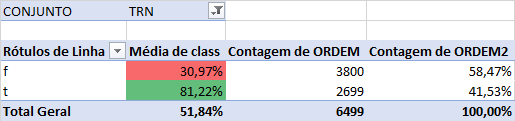

In [ ]:
df['CONTUSÕES_F'] = [1 if x == 'f' else 0 for x in df['bruises']]
df['CONTUSÕES_T'] = [1 if x == 't' else 0 for x in df['bruises']]

In [ ]:
df[['bruises', 'CONTUSÕES_F', 'CONTUSÕES_T']].drop_duplicates()

,bruises,CONTUSÕES_F,CONTUSÕES_T
3324,t,0,1
7275,f,1,0


### ODOR

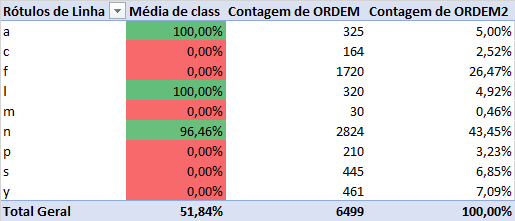

In [ ]:
df['ODOR_A_L_N'] = [1 if x == 'a' or x == 'l' or x == 'n' else 0 for x in df['odor']]

df[['ODOR_A_L_N', 'odor']].drop_duplicates()

,ODOR_A_L_N,odor
3324,1,n
401,1,a
7275,0,y
5040,0,f
6582,0,s
505,0,p
397,1,l
7336,0,m
3477,0,c


### ANEXO DE GUELRA

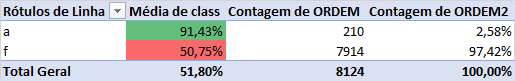

In [ ]:
df['ANEXO_GUELRA_A'] = [1 if x == 'a' else 0 for x in df['gill-attachment']] 
df['ANEXO_GUELRA_F'] = [1 if x == 'f' else 0 for x in df['gill-attachment']] 

df[['ANEXO_GUELRA_A', 'ANEXO_GUELRA_F', 'gill-attachment']].drop_duplicates()

,ANEXO_GUELRA_A,ANEXO_GUELRA_F,gill-attachment
3324,0,1,f
7388,1,0,a


### ESPAÇAMENTO BRANQUIAL

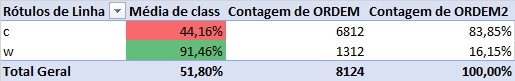

In [ ]:
df['ESPAÇAMENTO_BRANQUIAL_C'] = [1 if x == 'c' else 0 for x in df['gill-spacing']] 
df['ESPAÇAMENTO_BRANQUIAL_W'] = [1 if x == 'w' else 0 for x in df['gill-spacing']] 

df[['ESPAÇAMENTO_BRANQUIAL_C', 'ESPAÇAMENTO_BRANQUIAL_W', 'gill-spacing']].drop_duplicates()

,ESPAÇAMENTO_BRANQUIAL_C,ESPAÇAMENTO_BRANQUIAL_W,gill-spacing
3324,1,0,c
1371,0,1,w


### TAMANHO DAS GUELREAS

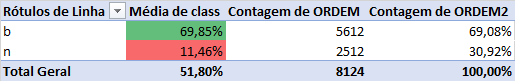

In [ ]:
df['TAMANHO_GUELRAS_B'] = [1 if x == 'b' else 0 for x in df['gill-size']] 
df['TAMANHO_GUELRAS_N'] = [1 if x == 'n' else 0 for x in df['gill-size']] 

df[['TAMANHO_GUELRAS_N', 'TAMANHO_GUELRAS_B', 'gill-size']].drop_duplicates()

,TAMANHO_GUELRAS_N,TAMANHO_GUELRAS_B,gill-size
3324,0,1,b
7275,1,0,n


### COR DAS GUELREAS

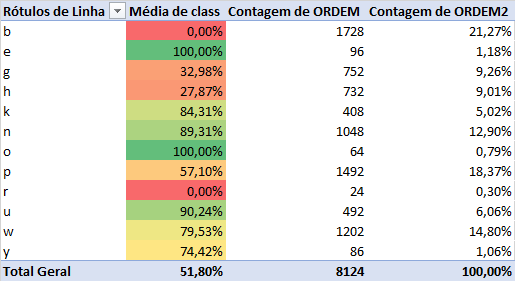

In [ ]:
df['COR_GUELREAS_B_R'] = [1 if x == 'b' or x == 'r' else 0 for x in df['gill-color']] 
df['COR_GUELREAS_G_H'] = [1 if x == 'g' or x == 'h' else 0 for x in df['gill-color']] 
df['COR_GUELREAS_K_N_U'] = [1 if x == 'k' or x == 'n' or x == 'u' else 0 for x in df['gill-color']]
df['COR_GUELREAS_W_Y'] = [1 if x == 'w' or x == 'y' else 0 for x in df['gill-color']]
df['COR_GUELREAS_P'] = [1 if x == 'p' else 0 for x in df['gill-color']]

df[['COR_GUELREAS_B_R', 'COR_GUELREAS_G_H', 'COR_GUELREAS_K_N_U', 'COR_GUELREAS_W_Y', 'COR_GUELREAS_P', 'gill-color']].drop_duplicates()

,COR_GUELREAS_B_R,COR_GUELREAS_G_H,COR_GUELREAS_K_N_U,COR_GUELREAS_W_Y,COR_GUELREAS_P,gill-color
3324,0,0,1,0,0,n
7275,1,0,0,0,0,b
2012,0,0,1,0,0,u
5599,0,0,0,1,0,w
5040,0,1,0,0,0,g
4531,0,1,0,0,0,h
1371,0,0,0,0,1,p
1386,0,0,1,0,0,k
4357,0,0,0,0,0,e
7388,0,0,0,0,0,o


### FORMA DO CAULE

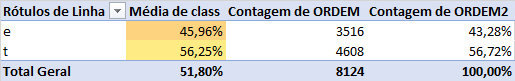

In [ ]:
df['FORMA_CAULE_E'] = [1 if x == 'e' else 0 for x in df['stalk-shape']]
df['FORMA_CAULE_T'] = [1 if x == 't' else 0 for x in df['stalk-shape']]

df[['FORMA_CAULE_E', 'FORMA_CAULE_T', 'stalk-shape']].drop_duplicates()

,FORMA_CAULE_E,FORMA_CAULE_T,stalk-shape
3324,0,1,t
401,1,0,e


### RAIZ DO CAULE

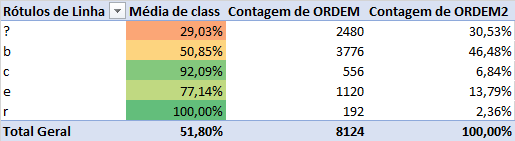

In [ ]:
df['RAIZ_CAULE_C_R_E'] = [1 if x == 'c' or x == 'r' or x == 'e' else 0 for x in df['stalk-root']]
df['RAIZ_CAULE_B'] = [1 if x == 'b' else 0 for x in df['stalk-root']]
df['RAIZ_CAULE_?'] = [1 if x == '?' else 0 for x in df['stalk-root']]

df[['RAIZ_CAULE_?', 'RAIZ_CAULE_B', 'RAIZ_CAULE_C_R_E', 'stalk-root']].drop_duplicates()

,RAIZ_CAULE_?,RAIZ_CAULE_B,RAIZ_CAULE_C_R_E,stalk-root
3324,0,1,0,b
401,0,0,1,c
7275,1,0,0,?
1371,0,0,1,e
607,0,0,1,r


### SUPERFICIE DA HASTE ACIMA DO ANEL

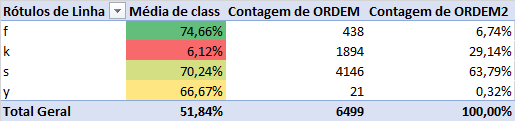

In [ ]:
df['SUPERFICIE_HASTE_ACIMA_ANEL_F_S'] = [1 if x == 'f' or x == 's' else 0 for x in df['stalk-surface-above-ring']]
df['SUPERFICIE_HASTE_ACIMA_ANEL_K'] = [1 if x == 'k' else 0 for x in df['stalk-surface-above-ring']]

df[['SUPERFICIE_HASTE_ACIMA_ANEL_F_S', 'SUPERFICIE_HASTE_ACIMA_ANEL_K', 'stalk-surface-above-ring']].drop_duplicates()

,SUPERFICIE_HASTE_ACIMA_ANEL_F_S,SUPERFICIE_HASTE_ACIMA_ANEL_K,stalk-surface-above-ring
3324,1,0,s
5040,0,1,k
1914,1,0,f
7702,0,0,y


### SUPERFICIE DA HASTE ABAIXO DO ANEL

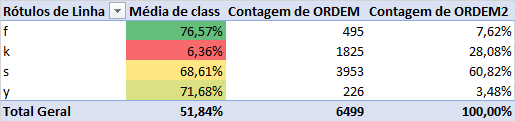

In [ ]:
df['SUPERFICIE_HASTE_ABAIXO_ANEL_S_Y_F'] = [1 if x == 'f' or x == 'y' or x == 's' else 0 for x in df['stalk-surface-below-ring']]
df['SUPERFICIE_HASTE_ABAIXO_ANEL_K'] = [1 if x == 'k' else 0 for x in df['stalk-surface-below-ring']]

df[['SUPERFICIE_HASTE_ABAIXO_ANEL_K', 'SUPERFICIE_HASTE_ABAIXO_ANEL_S_Y_F', 'stalk-surface-below-ring']].drop_duplicates()

,SUPERFICIE_HASTE_ABAIXO_ANEL_K,SUPERFICIE_HASTE_ABAIXO_ANEL_S_Y_F,stalk-surface-below-ring
3324,0,1,s
5599,0,1,f
5040,1,0,k
607,0,1,y


### COR DA HASTE ACIMA DO ANEL

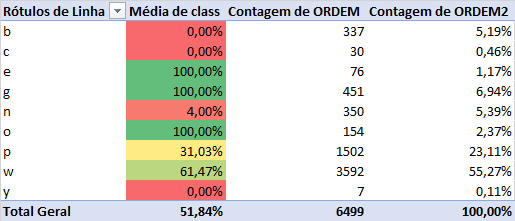

In [ ]:
df['COR_HASTE_ACIMA_ANEL_E_G_O'] = [1 if x == 'e' or x == 'g' or x == 'o' else 0 for x in df['stalk-color-above-ring']]
df['COR_HASTE_ACIMA_ANEL_P'] = [1 if x == 'p' else 0 for x in df['stalk-color-above-ring']]
df['COR_HASTE_ACIMA_ANEL_W'] = [1 if x == 'w' else 0 for x in df['stalk-color-above-ring']]

df[['COR_HASTE_ACIMA_ANEL_E_G_O', 'COR_HASTE_ACIMA_ANEL_P', 'COR_HASTE_ACIMA_ANEL_W', 'stalk-color-above-ring']].drop_duplicates()

,COR_HASTE_ACIMA_ANEL_E_G_O,COR_HASTE_ACIMA_ANEL_P,COR_HASTE_ACIMA_ANEL_W,stalk-color-above-ring
3324,1,0,0,g
401,0,0,1,w
7275,0,1,0,p
4531,0,0,0,b
4729,0,0,0,n
5588,1,0,0,e
7388,1,0,0,o
7336,0,0,0,c
7706,0,0,0,y


### COR DA HASTE ABAIXO DO ANEL

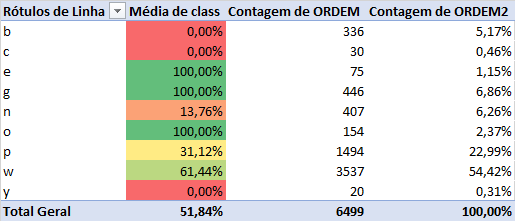

In [ ]:
df['COR_HASTE_ABAIXO_ANEL_E_G_O'] = [1 if x == 'e' or x == 'g' or x == 'o' else 0 for x in df['stalk-color-below-ring']]
df['COR_HASTE_ABAIXO_ANEL_P'] = [1 if x == 'p' else 0 for x in df['stalk-color-below-ring']]
df['COR_HASTE_ABAIXO_ANEL_W'] = [1 if x == 'w' else 0 for x in df['stalk-color-below-ring']]

df[['COR_HASTE_ABAIXO_ANEL_E_G_O', 'COR_HASTE_ABAIXO_ANEL_P', 'COR_HASTE_ABAIXO_ANEL_W', 'stalk-color-below-ring']].drop_duplicates()

,COR_HASTE_ABAIXO_ANEL_E_G_O,COR_HASTE_ABAIXO_ANEL_P,COR_HASTE_ABAIXO_ANEL_W,stalk-color-below-ring
3324,0,0,1,w
5040,0,1,0,p
4531,0,0,0,b
2082,1,0,0,g
3908,0,0,0,n
5907,1,0,0,e
7388,1,0,0,o
7336,0,0,0,c
5259,0,0,0,y


### TIPÓ DO VÉU

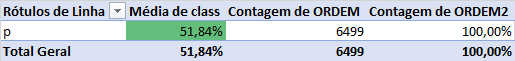

**Como essa coluna só tem apenas uma variavel eu entendi que não precisar fazer o pré_processamento dela**

### COR DO VÉU

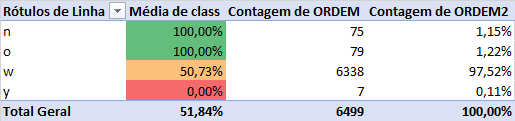

In [ ]:
df['COR_VÉU_W'] = [1 if x == 'w' else 0 for x in df['veil-color']]

df[['COR_VÉU_W', 'veil-color']].drop_duplicates()

,COR_VÉU_W,veil-color
3324,1,w
7388,0,o
7745,0,n
7706,0,y


### NÚMERO DE ANEL

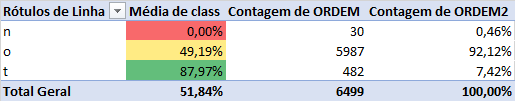

In [ ]:
df['NUMERO_ANEL_O'] = [1 if x == 'o' or x == 'n' else 0 for x in df['ring-number']]

df[['NUMERO_ANEL_O', 'ring-number']].drop_duplicates()

,NUMERO_ANEL_O,ring-number
3324,1,o
7960,0,t
7336,1,n


### TIPO DE ANEL

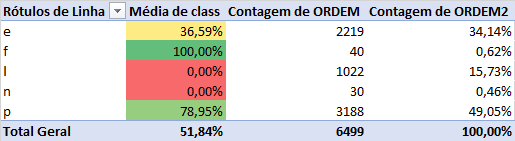

In [ ]:
df['TIPO_ANEL_P'] = [1 if x == 'p' else 0 for x in df['ring-type']]
df['TIPO_ANEL_E'] = [1 if x == 'e' else 0 for x in df['ring-type']]

df[['TIPO_ANEL_E', 'TIPO_ANEL_P', 'ring-type']].drop_duplicates()

,TIPO_ANEL_E,TIPO_ANEL_P,ring-type
3324,0,1,p
7275,1,0,e
5599,0,0,f
5040,0,0,l
7336,0,0,n


### COR DE IMPRESSÃO DE ESPOROS

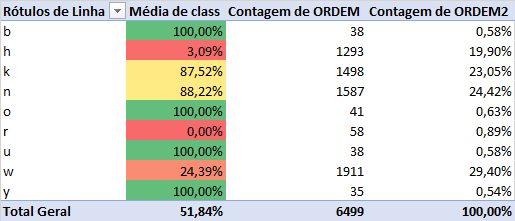

In [ ]:
df['COR_IMPRESSÃO_ESPOROS_K_N'] = [1 if x == 'k' or x == 'n' else 0 for x in df['spore-print-color']]
df['COR_IMPRESSÃO_ESPOROS_W'] = [1 if x == 'w' else 0 for x in df['spore-print-color']]
df['COR_IMPRESSÃO_ESPOROS_H'] = [1 if x == 'h' else 0 for x in df['spore-print-color']]

df[['COR_IMPRESSÃO_ESPOROS_H', 'COR_IMPRESSÃO_ESPOROS_W', 'COR_IMPRESSÃO_ESPOROS_K_N', 'spore-print-color']].drop_duplicates()

,COR_IMPRESSÃO_ESPOROS_H,COR_IMPRESSÃO_ESPOROS_W,COR_IMPRESSÃO_ESPOROS_K_N,spore-print-color
3324,0,0,1,n
401,0,0,1,k
7275,0,1,0,w
5599,1,0,0,h
7388,0,0,0,y
7745,0,0,0,b
5548,0,0,0,r
923,0,0,0,u
6910,0,0,0,o


### POPULAÇÃO

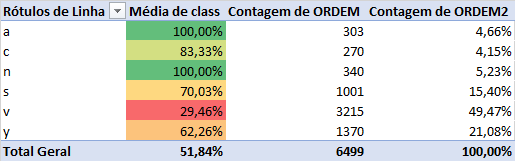

In [ ]:
df['POPULAÇÃO_A_C_N'] = [1 if x == 'a' or x == 'c' or x == 'n' else 0 for x in df['population']]
df['POPULAÇÃO_S_Y'] = [1 if x == 's' or x == 'y' else 0 for x in df['population']]
df['POPULAÇÃO_V'] = [1 if x == 'v' else 0 for x in df['population']]

df[['POPULAÇÃO_A_C_N', 'POPULAÇÃO_S_Y', 'POPULAÇÃO_V', 'population']].drop_duplicates()

,POPULAÇÃO_A_C_N,POPULAÇÃO_S_Y,POPULAÇÃO_V,population
3324,0,0,1,v
401,1,0,0,n
5599,0,1,0,y
1371,0,1,0,s
5907,1,0,0,c
1914,1,0,0,a


### HABITAT

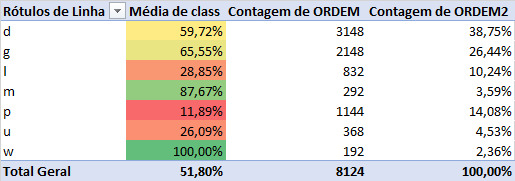

In [ ]:
df['HABITAT_D_G_M_W'] = [1 if x == 'd' or x == 'g' or x == 'm' or x == 'w' else 0 for x in df['habitat']]
df['HABITAT_L_U'] = [1 if x == 'l' or x == 'u' else 0 for x in df['habitat']]
df['HABITAT_P'] = [1 if x == 'p' else 0 for x in df['habitat']]

df[['HABITAT_D_G_M_W', 'HABITAT_L_U', 'HABITAT_P', 'habitat']].drop_duplicates()

,HABITAT_D_G_M_W,HABITAT_L_U,HABITAT_P,habitat
3324,1,0,0,d
401,1,0,0,m
7275,0,1,0,l
5040,0,0,1,p
4531,1,0,0,g
5907,1,0,0,w
949,0,1,0,u


In [ ]:
df['ALVO'] = [1 if x == 'e' else 0 for x in df['class']]
df[['ALVO', 'class']].drop_duplicates()

,ALVO,class
3324,1,e
7275,0,p


# SELECIONAR VARIÁVEIS PRÉ-PROCESSADAS

In [ ]:
cols_in = ['HABITAT_D_G_M_W', 
           'HABITAT_L_U', 
           'HABITAT_P',
           'POPULAÇÃO_A_C_N', 
           'POPULAÇÃO_S_Y', 
           'POPULAÇÃO_V',
           'COR_IMPRESSÃO_ESPOROS_H', 
           'COR_IMPRESSÃO_ESPOROS_W', 
           'COR_IMPRESSÃO_ESPOROS_K_N',
           'TIPO_ANEL_E', 
           'TIPO_ANEL_P',
           'NUMERO_ANEL_O',
           'COR_VÉU_W',
           'COR_HASTE_ABAIXO_ANEL_E_G_O', 
           'COR_HASTE_ABAIXO_ANEL_P', 
           'COR_HASTE_ABAIXO_ANEL_W',
           'COR_HASTE_ACIMA_ANEL_E_G_O', 
           'COR_HASTE_ACIMA_ANEL_P', 
           'COR_HASTE_ACIMA_ANEL_W',
           'SUPERFICIE_HASTE_ABAIXO_ANEL_K', 
           'SUPERFICIE_HASTE_ABAIXO_ANEL_S_Y_F',
           'SUPERFICIE_HASTE_ACIMA_ANEL_F_S', 
           'SUPERFICIE_HASTE_ACIMA_ANEL_K',
           'RAIZ_CAULE_?', 
           'RAIZ_CAULE_B', 
           'RAIZ_CAULE_C_R_E',
           'FORMA_CAULE_E', 
           'FORMA_CAULE_T',
           'COR_GUELREAS_B_R', 
           'COR_GUELREAS_G_H', 
           'COR_GUELREAS_K_N_U', 
           'COR_GUELREAS_W_Y', 
           'COR_GUELREAS_P',
           'TAMANHO_GUELRAS_N', 
           'TAMANHO_GUELRAS_B',
           'ESPAÇAMENTO_BRANQUIAL_C', 
           'ESPAÇAMENTO_BRANQUIAL_W',
           'ANEXO_GUELRA_A', 
           'ANEXO_GUELRA_F',
           'ODOR_A_L_N',
           'CONTUSÕES_F', 
           'CONTUSÕES_T',
           'COR_TAMPA_W', 
           'COR_TAMPA_G_N', 
           'COR_TAMPA_Y_P_B',
           'SUPERFÍCIE_TAMPA_F', 
           'SUPERFÍCIE_TAMPA_S', 
           'SUPERFÍCIE_TAMPA_Y',
           'FORMA_TAMPA_B_S', 
           'FORMA_TAMPA_F', 
           'FORMA_TAMPA_X',
           'ALVO'
           ]


# SEPARANDO OS CONJUNTOS

In [ ]:
X_treino = df.query("CONJUNTO == 'TRN'")
X_teste  = df.query("CONJUNTO == 'TST'")
X_treino = X_treino[cols_in]
X_teste  = X_teste[cols_in]

# Refazer e retirar Alvos

In [ ]:
y_treino = X_treino['ALVO']
y_teste  = X_teste['ALVO']
del X_treino['ALVO']
del X_teste['ALVO']

# Selecionando Atributos com RFE - Recursive Feature Elimination

## feature extraction

In [ ]:
model = LogisticRegression()
selected = RFE(model,step=1,n_features_to_select=8).fit(X_treino, y_treino)

print('--------------------------------------------------')
print('---  SELEÇÃO DE VARIÁVEIS  ---')
print('--------------------------------------------------')
print("Quantidade de Variáveis: %d" % selected.n_features_)
used_cols = []
for i in range(0, len(selected.support_)):
    if selected.support_[i]: 
        used_cols.append(X_treino.columns[i]) 
        print('             -> {:30}     '.format(X_treino.columns[i]))
print('--------------------------------------------------')

X_treino = X_treino[used_cols]     # Carrega colunas de entrada selecionadas por RFE
X_teste = X_teste[used_cols]       # Carrega colunas de entrada selecionadas por RFE

--------------------------------------------------
---  SELEÇÃO DE VARIÁVEIS  ---
--------------------------------------------------
Quantidade de Variáveis: 8
             -> COR_IMPRESSÃO_ESPOROS_K_N          
             -> SUPERFICIE_HASTE_ACIMA_ANEL_K      
             -> RAIZ_CAULE_?                       
             -> FORMA_CAULE_T                      
             -> COR_GUELREAS_B_R                   
             -> TAMANHO_GUELRAS_B                  
             -> ESPAÇAMENTO_BRANQUIAL_C            
             -> ODOR_A_L_N                         
--------------------------------------------------


# Modelo usando K vizinhos mais próximo

In [ ]:
parametros = {'n_neighbors': [i for i in range(1, 50)]}
busca = GridSearchCV(KNeighborsClassifier(), parametros, scoring='accuracy')
busca.fit(X_treino, y_treino)
print('Melhor estimador (modelo)')
busca.best_estimator_

Melhor estimador (modelo)


KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = busca.predict(X_teste)
round(accuracy_score(y_teste, y_pred), 2)

0.99

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
cm

array([[785,   1],
       [  9, 830]])

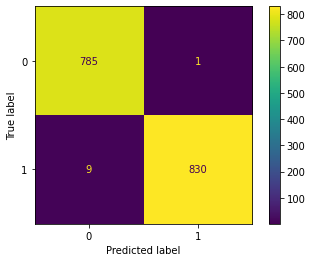

In [ ]:
ConfusionMatrixDisplay(cm).plot();

# Modelo usando árvore de decisão

In [ ]:
modelo = DecisionTreeClassifier(random_state=0)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = modelo.predict(X_teste)
accuracy_score(y_teste, y_pred)

0.9938461538461538

# Implantação

* **No futuro iremos simplificar mais ainda as variaveis para pessoas sem muitos conhecimentos em cogumelos coletarem as informações e usarem para prever se é venenoso e assim podendo até vender, ja os cogumelos são bem caros ou comerem em caso de extrema necessidade.**